In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
election2016 = pd.read_excel('federalelections2016.xlsx', header=3, nrows=51,
                            sheet_name='Table 2. Electoral &  Pop Vote')

# Crete column index
election2016.set_axis(["State", "Electoral Republicans", "Electorial Democrats", 
                   "Popular Republicans", "Popular Democrats", "Popular Other", "Popular Total"], 
                      axis=1, inplace=True)

# Figure R vs D state
election2016['Party'] = election2016.apply(lambda x:"R" if x['Popular Republicans'] > x['Popular Democrats'] else "D", 
                                           axis=1)
# Only keep party information
election2016=election2016[['State', 'Party']]

# Use State as index
election2016.set_index(['State'], inplace=True)

election2016.head(10)

,Party
State,
AL,R
AK,R
AZ,R
AR,R
CA,D
CO,D
CT,D
DE,D
DC,D


In [116]:
covid = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

# Only care about number of new death
covid = covid[['submission_date', 'state', 'new_death']]

# Rename columns
covid.set_axis(['Submission Date', 'State', 'Death'], axis=1, inplace=True)

covid.set_index(['State'], inplace=True)

covid.head(10)

,Submission Date,Death
State,,
CO,01/22/2020,0
CO,01/23/2020,0
CO,01/24/2020,0
CO,01/25/2020,0
CO,01/26/2020,0
CO,01/27/2020,0
CO,01/28/2020,0
CO,01/29/2020,0
CO,01/30/2020,0


In [117]:
population2019 = pd.read_excel('nst-est2019-01.xlsx', header=3, nrows=56)
population2019.drop([0,1,2,3,4], inplace=True)
population2019=population2019.iloc[:,-1:]
population2019.set_axis(['Population'], axis=1, inplace=True)
population2019.head(10)

,Population
5,4903185
6,731545
7,7278717
8,3017804
9,39512223
10,5758736
11,3565287
12,973764
13,705749
14,21477737


In [161]:
# Stitching 3 df together
df = election2016.copy()
df['Population'] = population2019['Population'].tolist()
df = df.join(covid)
df.reset_index(inplace=True)

# Death distributions by party

In [162]:
d = df[df['Party']=='D']['Death'].sum()
r = df[df['Party']=='R']['Death'].sum()
print("Total deaths in Democratic states: {}, total deaths in Republican states: {}".format(d, r))

Total deaths in Democratic states: 89739, total deaths in Republican states: 115246


In [163]:
# Normalize by population
d = df[df['Party']=='D']['Death'].sum()/df[df['Party']=='D']['Population'].sum()*100000
r = df[df['Party']=='R']['Death'].sum()/df[df['Party']=='R']['Population'].sum()*100000
print("Total deaths per 100K capita in Democratic states: {}, total deaths per 100K capita in Republican states: {}".format(str(round(d, 3)), str(round(r, 3))))

Total deaths per 100K capita in Democratic states: 0.223, total deaths per 100K capita in Republican states: 0.217


In [164]:
# Rolling 7 days death
df['Rolling 7 Day Death'] = df.rolling(7).mean()['Death']
# Remote Jan since the rolling function "bleed through" across states
df.drop(df[df['Submission Date'].str.match('^01/.?.?/2020')].index, inplace=True)
df['Rolling 7 Day Death Per 100K Capita'] = df.apply(lambda x:x['Rolling 7 Day Death']/x['Population']*100000, 
                                                     axis=1)
df.head(10)

,State,Party,Population,Submission Date,Death,Rolling 7 Day Death,Rolling 7 Day Death Per 100K Capita
10,AK,R,731545,02/01/2020,0,0.0,0.0
11,AK,R,731545,02/02/2020,0,0.0,0.0
12,AK,R,731545,02/03/2020,0,0.0,0.0
13,AK,R,731545,02/04/2020,0,0.0,0.0
14,AK,R,731545,02/05/2020,0,0.0,0.0
15,AK,R,731545,02/06/2020,0,0.0,0.0
16,AK,R,731545,02/07/2020,0,0.0,0.0
17,AK,R,731545,02/08/2020,0,0.0,0.0
18,AK,R,731545,02/09/2020,0,0.0,0.0
19,AK,R,731545,02/10/2020,0,0.0,0.0


In [175]:
rollingDeath = pd.pivot_table(df, values='Rolling 7 Day Death Per 100K Capita', index=['Submission Date'],
                    columns=['Party'])
rollingDeath = rollingDeath.iloc[0::7,:]

AttributeError: 'Rectangle' object has no property 'ylabel'

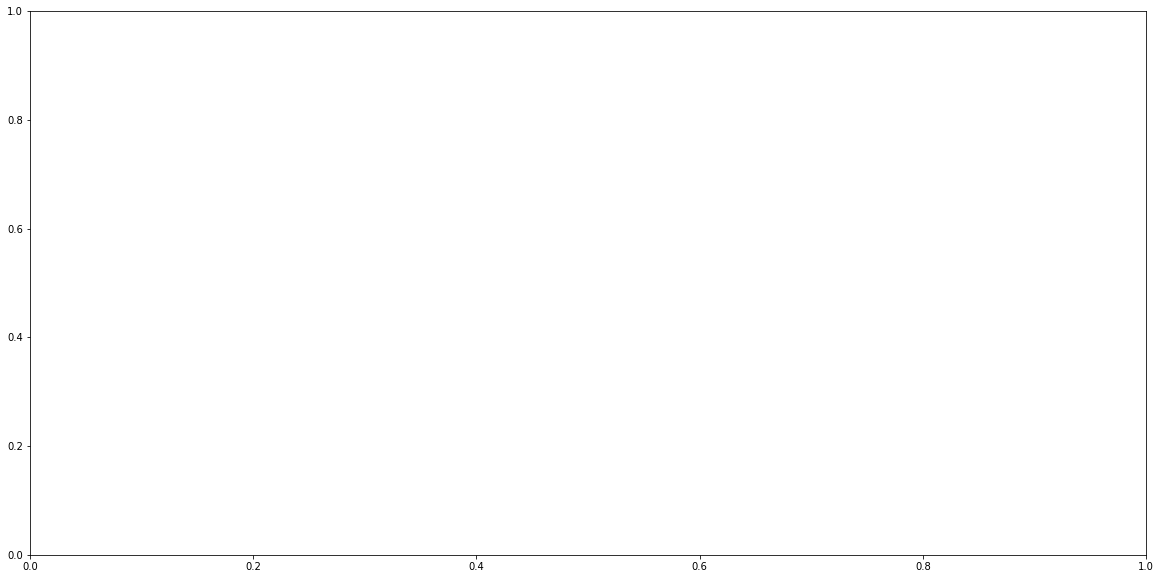

In [180]:
rollingDeath.plot(kind="bar", figsize=(20,10), ylabel="Rolling 7 Day Death Per 100K Capita")